In [1]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)


In [5]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50

log_reg = LogisticRegression(max_iter=1_000)

log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])


LogisticRegression(max_iter=1000)

In [6]:
log_reg.score(X_test, y_test)

0.8222222222222222

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=n_labeled)

X_digits_dist = kmeans.fit_transform(X_train)

In [24]:
import numpy as np

representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

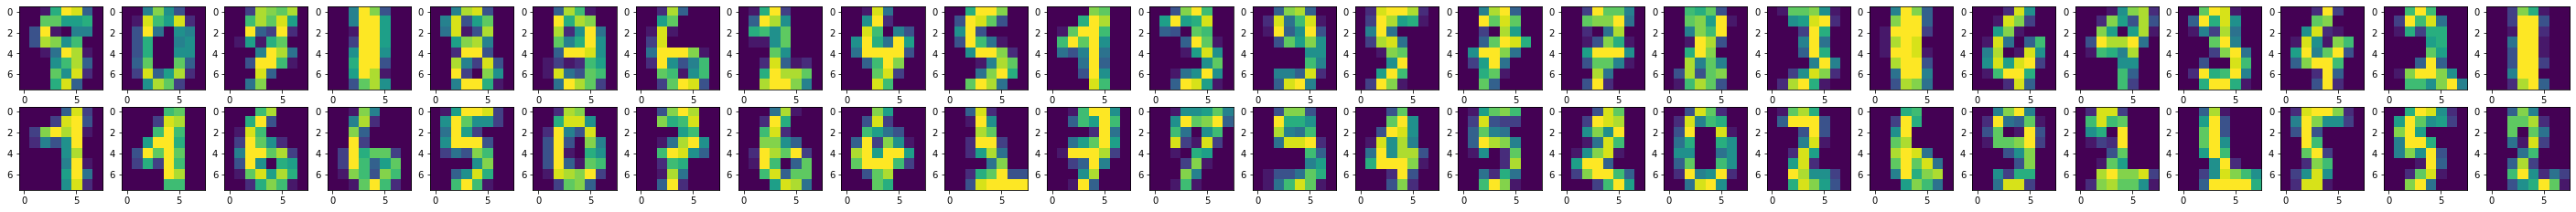

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 50))

for index, digit in enumerate(X_representative_digits):
    plt.subplot(25, 25, index + 1)
    plt.imshow(digit.reshape(8, 8))

In [50]:
y_representative_digits = np.array(
    [8, 0, 7, 1, 8, 9, 6, 2, 4, 5, 1, 3, 9, 5, 7, 7, 8, 3, 1, 4, 9, 3, 4, 2, 1, 1, 1, 6, 6, 5, 0, 7, 6, 4, 1, 7, 7, 9,
     4, 5, 2, 0, 2, 6, 9, 2, 1, 5, 5, 2])

In [52]:
log_reg = LogisticRegression(max_iter=1_000)

log_reg.fit(X_representative_digits, y_representative_digits)

LogisticRegression(max_iter=1000)

In [53]:
log_reg.score(X_test, y_test)


0.9111111111111111

In [72]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)

for i in range(n_labeled):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

array([8, 0, 7, 1, 8, 9, 6, 2, 4, 5, 1, 3, 9, 5, 7, 7, 8, 3, 1, 4, 9, 3,
       4, 2, 1, 1, 1, 6, 6, 5, 0, 7, 6, 4, 1, 7, 7, 9, 4, 5, 2, 0, 2, 6,
       9, 2, 1, 5, 5, 2])

In [75]:
log_reg = LogisticRegression(max_iter=10_000)

log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=10000)

In [76]:
log_reg.score(X_test, y_test)


0.9022222222222223

In [112]:
percentile_closest = 20
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

for i in range(n_labeled):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)

X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]


In [113]:
log_reg = LogisticRegression(max_iter=10_000)

log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)


LogisticRegression(max_iter=10000)

In [121]:
np.mean(y_train[partially_propagated] == y_train_partially_propagated)

0.9825783972125436